# Importing the relevant modules



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Exploratory Data Analysis (EDA)

a. Loading and Previewing the data to understand its structure and key characteristics.

b. Summarising the data including mean, median, minimum, maximum and count of missing values if any.

c. Perform Univariate and multivariate analysis to understand distributions and relationships among variables.

d. Visualise the distributions of transaction types, amounts and other relevant features.

e. Identify and handle any class imbalances, if applicable

##### 1a. Loading and Previewing the data to understand its structure and key characteristics.

In [68]:
df.head(10)

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Gender,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,Bene_Gender,USD_amount,Label,Transaction_Type
0,15/03/2022 10:24,QUICK-PAYMENT-8757,JPMC-CLIENT-8738,ACCOUNT-8753,USA,Male,31927.0,CCB,JPMC-CLIENT-8736,ACCOUNT-8748,United States Of America,Male,687.76,0.0,QUICK-PAYMENT
1,15/03/2022 10:24,QUICK-PAYMENT-8477,JPMC-CLIENT-8458,ACCOUNT-8469,USA,Female,46709.0,CCB,CLIENT-8460,ACCOUNT-8472,Canada,Male,100.40,0.0,QUICK-PAYMENT
2,15/03/2022 10:24,WITHDRAWAL-7635,JPMC-CLIENT-7614,ACCOUNT-7625,USA,Female,29504.0,CCB,NaN,NaN,NaN,Female,646.64,0.0,EXCHANGE
3,15/03/2022 10:24,QUICK-PAYMENT-7065,JPMC-CLIENT-7048,ACCOUNT-7059,USA,Male,10365.0,CCB,CLIENT-7050,ACCOUNT-7063,Canada,NaN,582.67,0.0,QUICK-PAYMENT
4,15/03/2022 10:24,QUICK-DEPOSIT-6991,NaN,NaN,NaN,Female,NaN,NaN,JPMC-CLIENT-6974,ACCOUNT-6985,United States Of America,Female,569.50,0.0,DEPOSIT-CASH
5,15/03/2022 10:24,WITHDRAWAL-6431,JPMC-CLIENT-6414,ACCOUNT-6424,USA,Female,49654.0,CCB,NaN,NaN,NaN,NaN,499.13,0.0,EXCHANGE
6,15/03/2022 10:24,MOVE-FUNDS-6432,CLIENT-6433,ACCOUNT-6434,USA,NaN,45688.0,CCB,JPMC-CLIENT-6414,ACCOUNT-6425,United States Of America,NaN,869.41,0.0,MOVE-FUNDS
7,15/03/2022 10:24,QUICK-DEPOSIT-5547,NaN,NaN,NaN,Female,NaN,NaN,JPMC-CLIENT-5529,ACCOUNT-5540,United States Of America,Male,234.90,0.0,DEPOSIT-CASH
8,15/03/2022 10:24,DEPOSIT-CHECK-5242,NaN,NaN,NaN,Male,NaN,NaN,JPMC-CLIENT-5222,ACCOUNT-5234,United States Of America,Male,935.00,0.0,DEPOSIT-CHECK
9,15/03/2022 10:24,DEPOSIT-CASH-4807,NaN,NaN,NaN,Male,NaN,NaN,JPMC-CLIENT-4789,ACCOUNT-4800,United States Of America,NaN,100.45,0.0,DEPOSIT-CASH


In [16]:
# a. Loading and previewing the data to understand its structure and key characteristics
csv_path = Path("dataset.csv")
df = pd.read_csv(csv_path)
print(f"\n Shape of the dataset is {df.shape}")
print(f"\n Columns of the dataset is \n{df.columns}")


 Shape of the dataset is (20501, 15)

 Columns of the dataset is 
Index(['Time_step', 'Transaction_Id', 'Sender_Id', 'Sender_Account',
       'Sender_Country', 'Sender_Gender', 'Sender_Sector', 'Sender_lob',
       'Bene_Id', 'Bene_Account', 'Bene_Country', 'Bene_Gender', 'USD_amount',
       'Label', 'Transaction_Type'],
      dtype='object')


##### Scatter Plot: Sender Country vs Beneficiary Country for Fraud Cases (Label=1)


TypeError: 'value' must be an instance of str or bytes, not a float

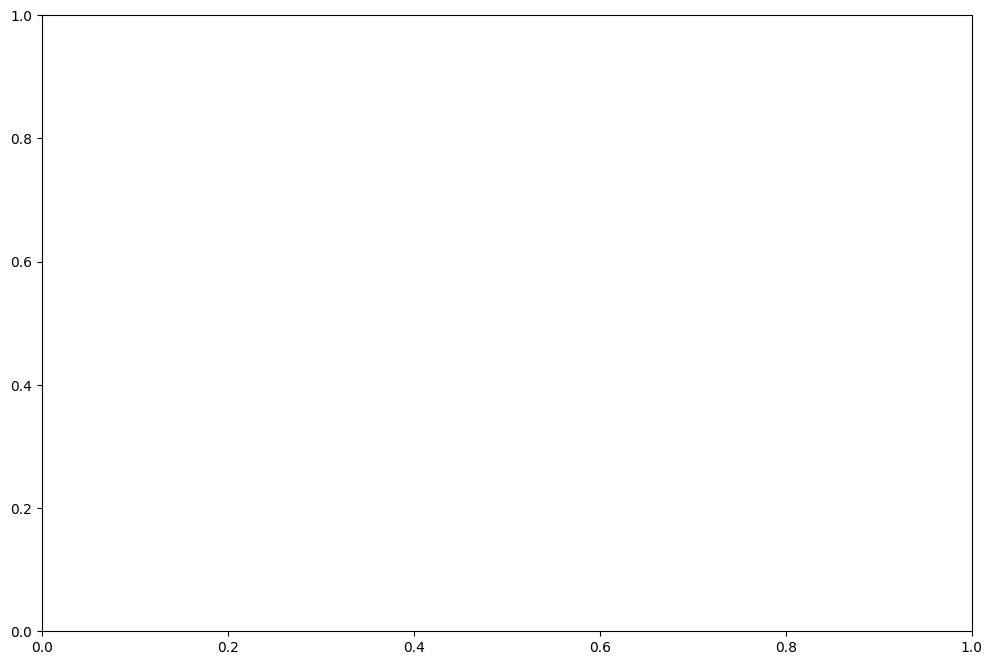

In [ ]:
# Filter data for fraud cases only (label=1)
fraud_data = df[df['Label'] == 1].copy()

# Check for missing values in country columns
print("Missing values in country columns:")
print(f"Sender_Country missing: {fraud_data['Sender_Country'].isna().sum()}")
print(f"Bene_Country missing: {fraud_data['Bene_Country'].isna().sum()}")

# Remove rows with missing country values
fraud_data_clean = fraud_data.dropna(subset=['Sender_Country', 'Bene_Country'])

print(f"\nAfter cleaning:")
print(f"Total fraud cases: {len(fraud_data_clean)}")

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(fraud_data_clean['Sender_Country'], fraud_data_clean['Bene_Country'], 
           alpha=0.6, s=50, c='red', edgecolors='black', linewidth=0.5)

# Customize the plot
plt.title('Fraud Cases: Sender Country vs Beneficiary Country', fontsize=16, fontweight='bold')
plt.xlabel('Sender Country', fontsize=12)
plt.ylabel('Beneficiary Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
print(f"\nStatistics:")
print(f"Unique sender countries in fraud cases: {fraud_data_clean['Sender_Country'].nunique()}")
print(f"Unique beneficiary countries in fraud cases: {fraud_data_clean['Bene_Country'].nunique()}")

# Show top country combinations for fraud
country_combinations = fraud_data_clean.groupby(['Sender_Country', 'Bene_Country']).size().sort_values(ascending=False)
print(f"\nTop 10 fraud country combinations:")
print(country_combinations.head(10))


##### 1b. Summarize the data, including mean, median, minimum, maximum.

In [ ]:
df_summary = df.describe()
df_summary

,Sender_Sector,USD_amount,Label
count,17548.000000,20499.00000,20499.000000
mean,25034.227889,510.97427,0.019123
std,14403.845960,554.64498,0.136960
min,1.000000,0.00000,0.000000
25%,12632.750000,137.93500,0.000000
50%,25113.000000,406.91000,0.000000
75%,37417.000000,729.83500,0.000000
max,49997.000000,19838.58000,1.000000


In [19]:
# Summary of all features

summary = []
number_of_rows = len(df)

for col in df.columns:
    dtype = df[col].dtype
    unique_values = df[col].nunique()

    summary.append({
        "column": col,
        "dtype": str(dtype),
        "no_of_unique_vals": unique_values
    })

feature_summary = pd.DataFrame(summary)

feature_summary

,column,dtype,no_of_unique_vals
0,Time_step,object,16119
1,Transaction_Id,object,20499
2,Sender_Id,object,2156
3,Sender_Account,object,3221
4,Sender_Country,object,228
5,Sender_Gender,object,2
6,Sender_Sector,float64,14790
7,Sender_lob,object,1
8,Bene_Id,object,7228
9,Bene_Account,object,8207


##### 1c/ 1d. Perform univariate and multivariate analysis to understand distributions and relationships among variables. 


For 1c, univariate analysis comprised of the following -

- Number of Frauds vs non-frauds
- Distribution of USD_Amount 
- Percentage distribution according to Transaction type
- Top 5 sender countries
- Top 5 beneficiary countries

************************************************************
Univariate Analysis
************************************************************


/var/folders/59/bqwk3sd954l3r3t_3z9p69gw0000gn/T/ipykernel_2118/3800483259.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


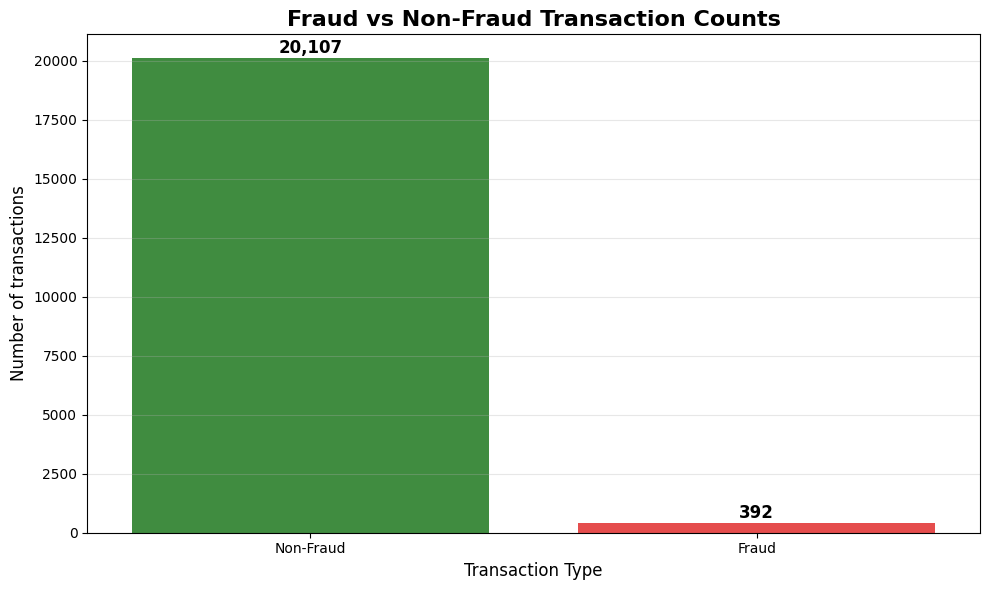

In [117]:

#1. Univariate Analysis

print('*'*60)
print("Univariate Analysis")
print("*"*60)


df.Label.value_counts()

#c1. Target distribution
plt.figure(figsize=(10,6))
fraud_counts = df['Label'].value_counts().sort_index()
labels = ['Non-Fraud','Fraud']

# Dataframe creation for plotting using seaborn
plot_data = pd.DataFrame({
    'Transaction_Type': labels,
    'Count': fraud_counts.values
})

sns.barplot(
    data=plot_data,
    x='Transaction_Type',
    y='Count',
    palette=['green','red'],
    alpha=0.8
)
plt.title("Fraud vs Non-Fraud Transaction Counts", fontsize=16, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of transactions', fontsize=12)


# Adding up of count labels
for i, v in enumerate(fraud_counts.values):
    plt.text(i, v + 50, f'{v:,}', ha='center', va='bottom', 
             fontweight='bold', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

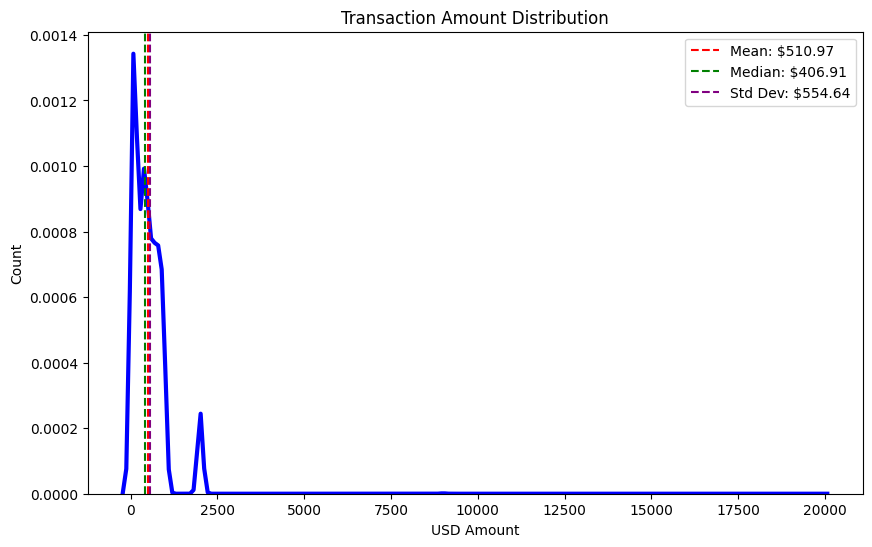

In [ ]:
# Transaction Distribution

plt.figure(figsize=(10, 6))
#plt.hist(df['USD_amount'], bins=100, color='skyblue', edgecolor='black')
sns.kdeplot(data=df, x='USD_amount', color='blue',linewidth=3)

mean_of_usd_amount = df['USD_amount'].mean()
median_of_usd_amount = df['USD_amount'].median()
std_of_usd_amount = df['USD_amount'].std()
plt.axvline(mean_of_usd_amount, color='red', linestyle='--', label=f'Mean: ${mean_of_usd_amount:.2f}')
plt.axvline(median_of_usd_amount, color='green', linestyle='--', label=f'Median: ${median_of_usd_amount:.2f}')
plt.axvline(std_of_usd_amount, color='purple', linestyle='--', label=f'Std Dev: ${std_of_usd_amount:.2f}')

plt.legend()
#plt.axvline(mean_of_usd_amount, color='red', linestyle='--', label='Mean')
#plt.axvline(median_of_usd_amount, color='green', linestyle='--', label='Median')
#plt.axvline(std_of_usd_amount, color='purple', linestyle='--', label='Standard Deviation')

plt.title('Transaction Amount Distribution')
plt.xlabel('USD Amount')
plt.ylabel('Count')

plt.show()

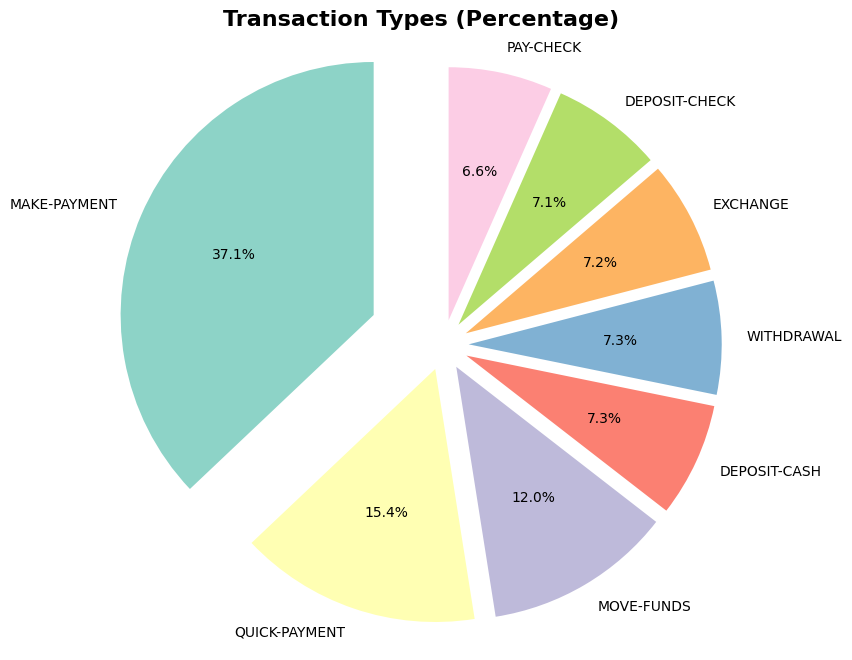

In [116]:
# Pie chart with one slice exploded
transaction_counts = df['Transaction_Type'].value_counts()
explode = (0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Explode the slices

plt.figure(figsize=(10, 8))
plt.pie(transaction_counts.values, labels=transaction_counts.index, autopct='%1.1f%%', 
        explode=explode, startangle=90, colors=plt.cm.Set3.colors)
plt.title('Transaction Types (Percentage)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

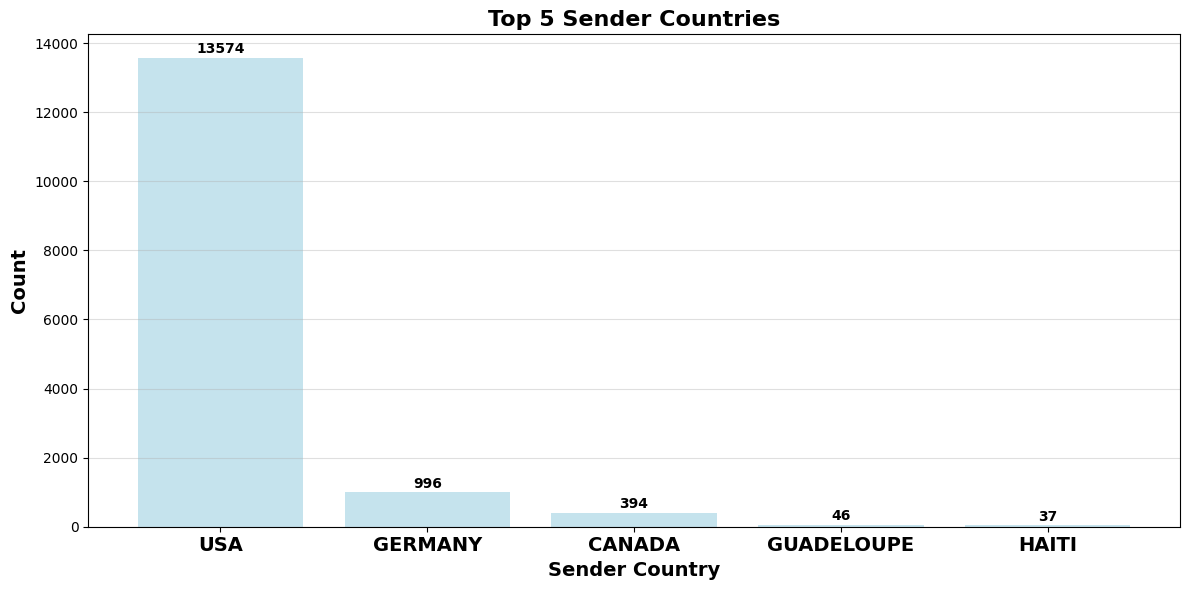

In [ ]:
# Top 5 Sender Countries
sender_counts = df['Sender_Country'].value_counts().head(5)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(sender_counts)), sender_counts.values, color='lightblue', alpha=0.7)
plt.title('Top 5 Sender Countries', fontsize=16, fontweight='bold')
plt.xlabel('Sender Country', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(range(len(sender_counts)), sender_counts.index, ha='center', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.4)

# Add count labels on bars
for i, v in enumerate(sender_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

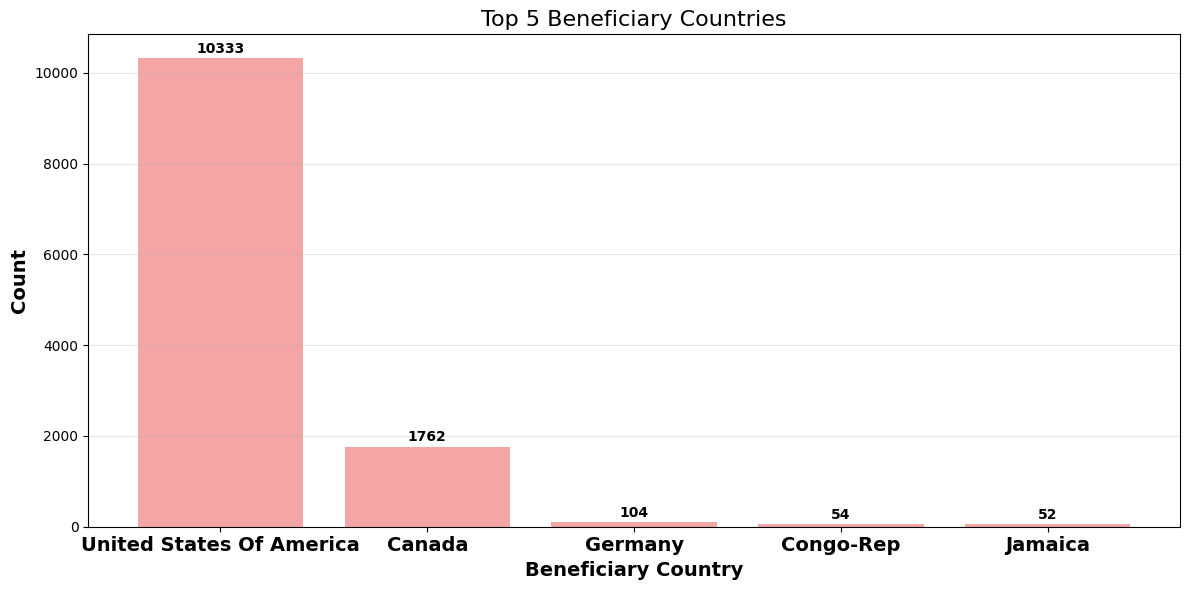

In [ ]:
# Top 5 Beneficiary Countries
bene_counts = df['Bene_Country'].value_counts().head(5)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(bene_counts)), bene_counts.values, color='lightcoral', alpha=0.7)
plt.title('Top 5 Beneficiary Countries', fontsize=16)
plt.xlabel('Beneficiary Country', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(range(len(bene_counts)), bene_counts.index, ha='center', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(bene_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

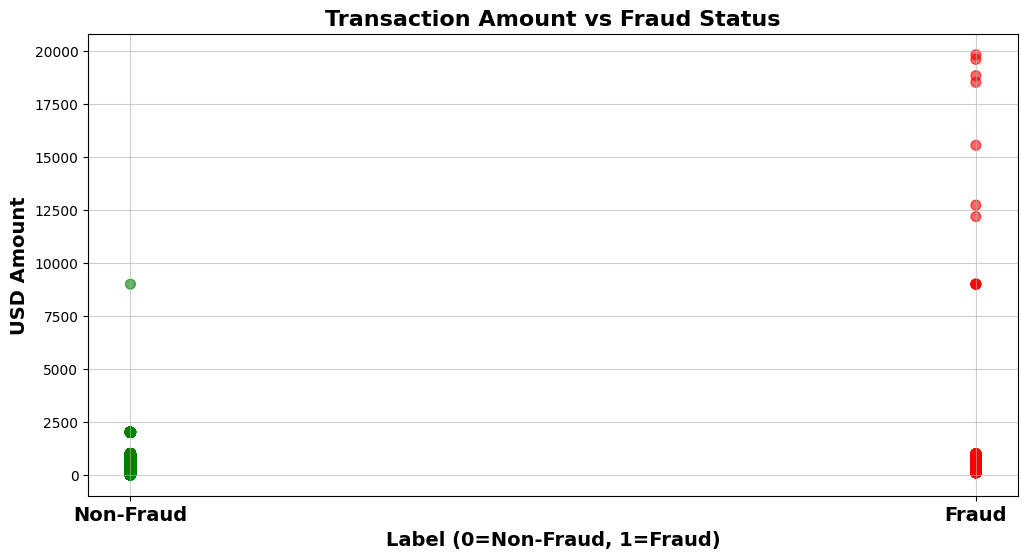

In [ ]:
# MultiVariate Analysis

# Scatter plot: USD Amount (x-axis) vs Label (y-axis)
plt.figure(figsize=(12, 6))
#plt.scatter(df['USD_amount'], df['Label'], alpha=0.6, s=20)
colors = ['green' if x == 0 else 'red' for x in df['Label']]
plt.scatter(df['Label'],df['USD_amount'], alpha=0.6, s=50, c=colors)


plt.title('Transaction Amount vs Fraud Status',fontsize='16',fontweight='bold')

#plt.xlabel('USD Amount')
#plt.ylabel('Label (0=Non-Fraud, 1=Fraud)')

plt.xlabel('Label (0=Non-Fraud, 1=Fraud)',fontsize='14',fontweight='bold')
plt.ylabel('USD Amount',fontsize='14',fontweight='bold')

plt.grid(alpha=0.6)

plt.xticks([0, 1], ['Non-Fraud = 0', 'Fraud = 1'],fontsize='14',fontweight='bold')
plt.show()

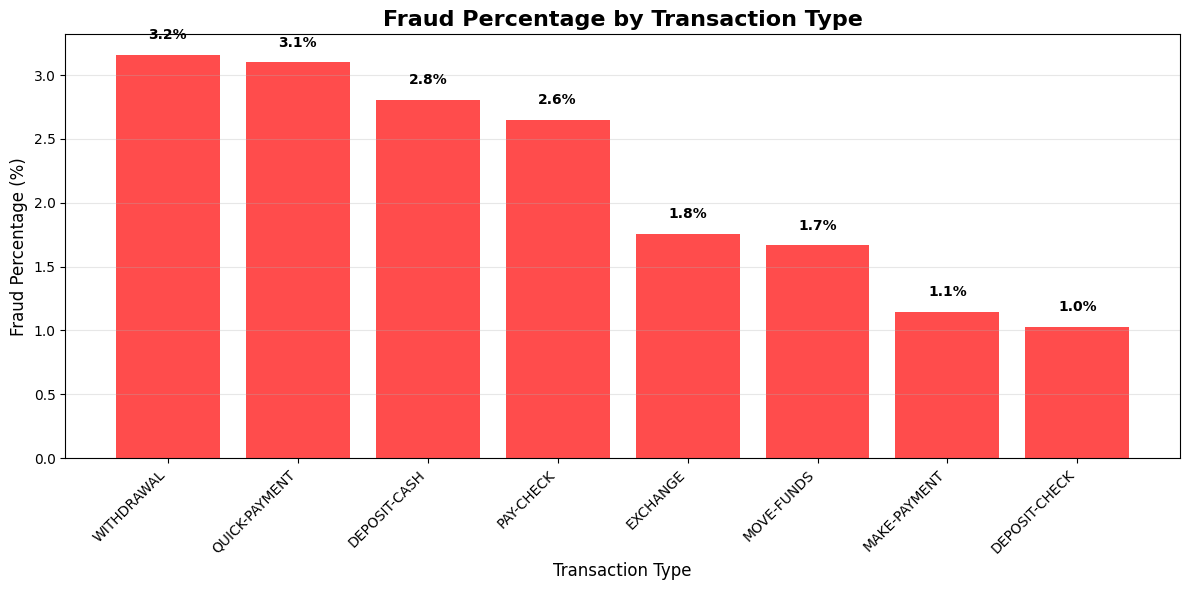

In [151]:
# Calculate fraud percentage per transaction type
fraud_by_type = df.groupby('Transaction_Type')['Label'].agg(['count', 'sum']).reset_index()
fraud_by_type['fraud_percentage'] = (fraud_by_type['sum'] / fraud_by_type['count']) * 100
fraud_by_type = fraud_by_type.sort_values('fraud_percentage', ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(fraud_by_type)), fraud_by_type['fraud_percentage'], 
               color='red', alpha=0.7)
plt.title('Fraud Percentage by Transaction Type', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.xticks(range(len(fraud_by_type)), fraud_by_type['Transaction_Type'], 
           rotation=45, ha='right')

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, fraud_by_type['fraud_percentage'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

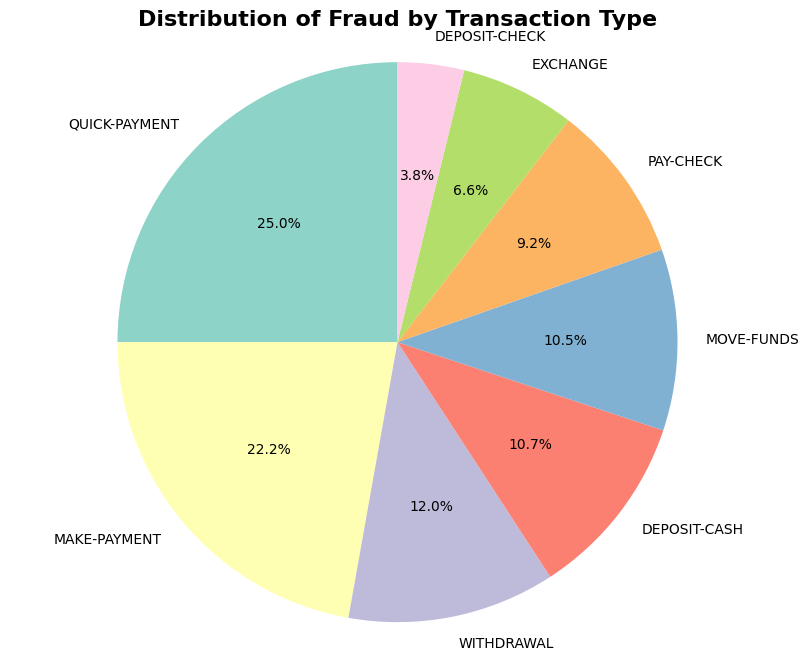

In [152]:
# Calculate fraud distribution by transaction type
fraud_by_type = df[df['Label'] == 1.0]['Transaction_Type'].value_counts()
fraud_percentages = (fraud_by_type / fraud_by_type.sum()) * 100

# Create pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3.colors
plt.pie(fraud_percentages.values, labels=fraud_percentages.index, 
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Fraud by Transaction Type', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

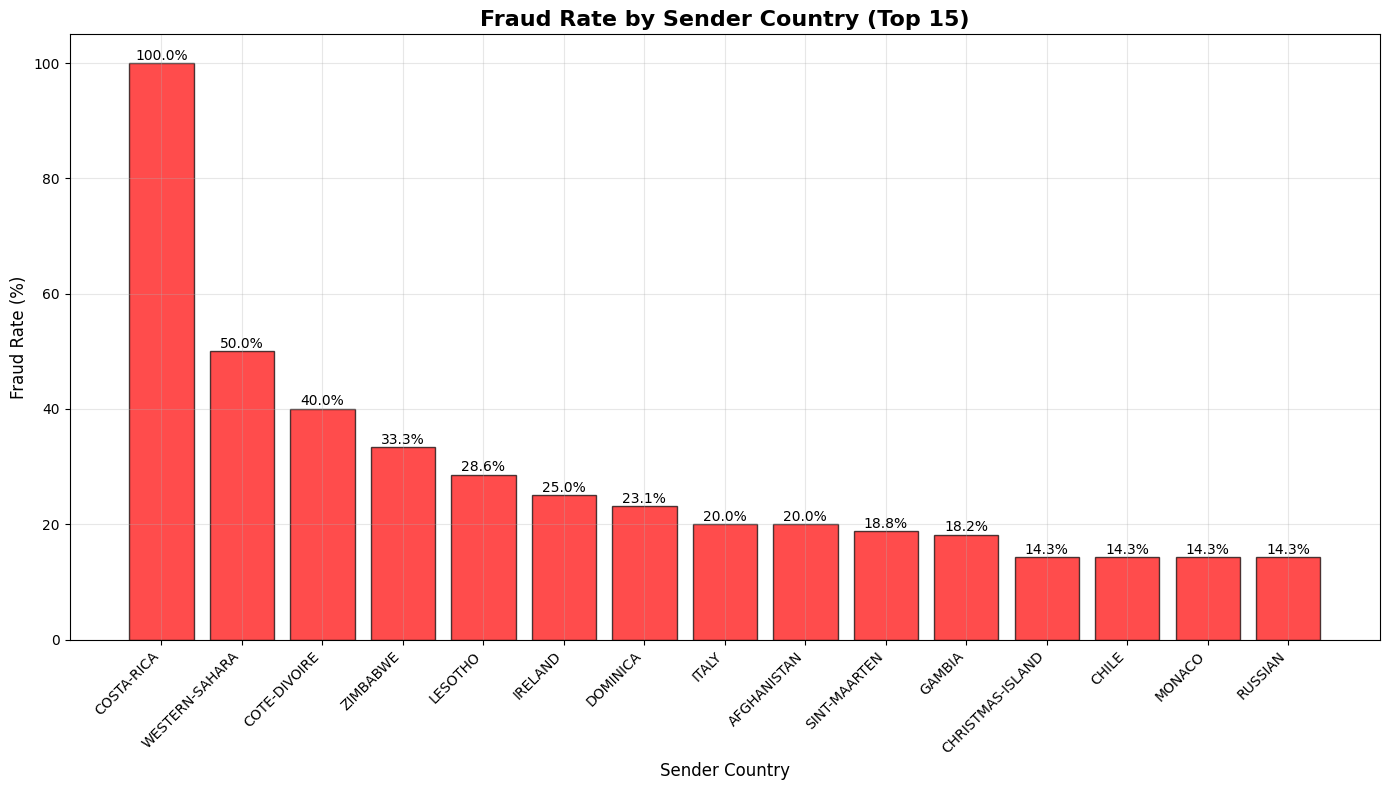

Top 10 Sender Countries by Fraud Rate:
                total_transactions  fraud_count  fraud_rate
Sender_Country                                             
COSTA-RICA                       1          1.0      100.00
WESTERN-SAHARA                   4          2.0       50.00
COTE-DIVOIRE                     5          2.0       40.00
ZIMBABWE                         3          1.0       33.33
LESOTHO                          7          2.0       28.57
IRELAND                          4          1.0       25.00
DOMINICA                        13          3.0       23.08
ITALY                            5          1.0       20.00
AFGHANISTAN                      5          1.0       20.00
SINT-MAARTEN                    16          3.0       18.75


In [158]:
# Fraud Rate by Sender Country

# Calculate fraud rate by sender country
sender_fraud = df.groupby('Sender_Country').agg({
    'Label': ['count', 'sum']
}).round(2)
sender_fraud.columns = ['total_transactions', 'fraud_count']
sender_fraud['fraud_rate'] = (sender_fraud['fraud_count'] / sender_fraud['total_transactions'] * 100).round(2)

# Sort by fraud rate and take top 15
sender_fraud_sorted = sender_fraud.sort_values('fraud_rate', ascending=False).head(15)

# Create the plot
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(sender_fraud_sorted)), sender_fraud_sorted['fraud_rate'], 
               color='red', alpha=0.7, edgecolor='black')

plt.title('Fraud Rate by Sender Country (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Sender Country', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(range(len(sender_fraud_sorted)), sender_fraud_sorted.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
print("Top 10 Sender Countries by Fraud Rate:")
print("="*50)
print(sender_fraud_sorted.head(10)[['total_transactions', 'fraud_count', 'fraud_rate']])

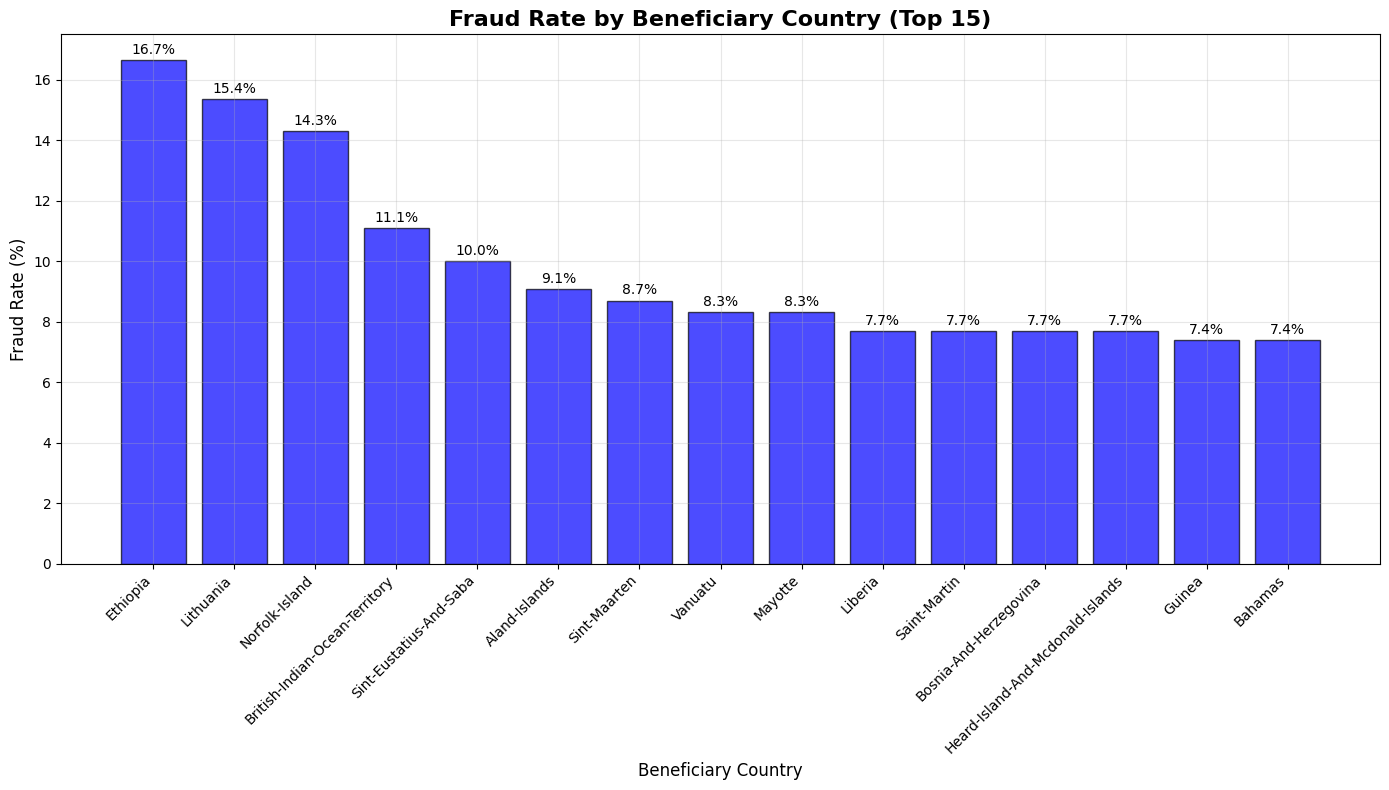

Top 10 Beneficiary Countries by Fraud Rate:
                                total_transactions  fraud_count  fraud_rate
Bene_Country                                                               
Ethiopia                                         6          1.0       16.67
Lithuania                                       26          4.0       15.38
Norfolk-Island                                   7          1.0       14.29
British-Indian-Ocean-Territory                   9          1.0       11.11
Sint-Eustatius-And-Saba                         10          1.0       10.00
Aland-Islands                                   22          2.0        9.09
Sint-Maarten                                    23          2.0        8.70
Vanuatu                                         24          2.0        8.33
Mayotte                                         24          2.0        8.33
Liberia                                         13          1.0        7.69


In [159]:
# Fraud Rate by Beneficiary Country

# Calculate fraud rate by beneficiary country
bene_fraud = df.groupby('Bene_Country').agg({
    'Label': ['count', 'sum']
}).round(2)
bene_fraud.columns = ['total_transactions', 'fraud_count']
bene_fraud['fraud_rate'] = (bene_fraud['fraud_count'] / bene_fraud['total_transactions'] * 100).round(2)

# Sort by fraud rate and take top 15
bene_fraud_sorted = bene_fraud.sort_values('fraud_rate', ascending=False).head(15)

# Create the plot
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(bene_fraud_sorted)), bene_fraud_sorted['fraud_rate'], 
               color='blue', alpha=0.7, edgecolor='black')

plt.title('Fraud Rate by Beneficiary Country (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Beneficiary Country', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(range(len(bene_fraud_sorted)), bene_fraud_sorted.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
print("Top 10 Beneficiary Countries by Fraud Rate:")
print("="*50)
print(bene_fraud_sorted.head(10)[['total_transactions', 'fraud_count', 'fraud_rate']])